# Prepare a model for glass classification using KNN

## Data Description:

### RI : refractive index

### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

### Mg: Magnesium

### AI: Aluminum

### Si: Silicon

### K:Potassium

### Ca: Calcium

### Ba: Barium

### Fe: Iron

### Type: Type of glass: (class attribute)
#### 1 -- building_windows_float_processed
#### 2 -- building_windows_non_float_processed
#### 3 -- vehicle_windows_float_processed
#### 4 -- vehicle_windows_non_float_processed (none in this database)
#### 5 -- containers
#### 6 -- tableware
#### 7 -- headlamps
----

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

### Import Data

In [2]:
glass_data = pd.read_csv("glass.csv")
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


### Data Understanding

In [5]:
glass_data.shape

(214, 10)

In [6]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
glass_data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [11]:
glass_data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [13]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

### Finding the correlation

In [14]:
corr = glass_data.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


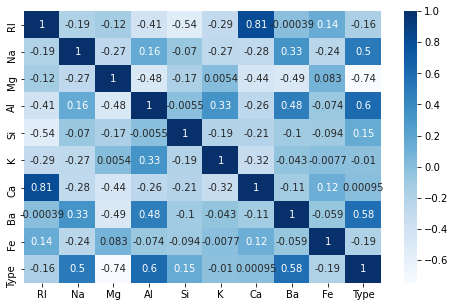

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

### Data Visualization of target variable 

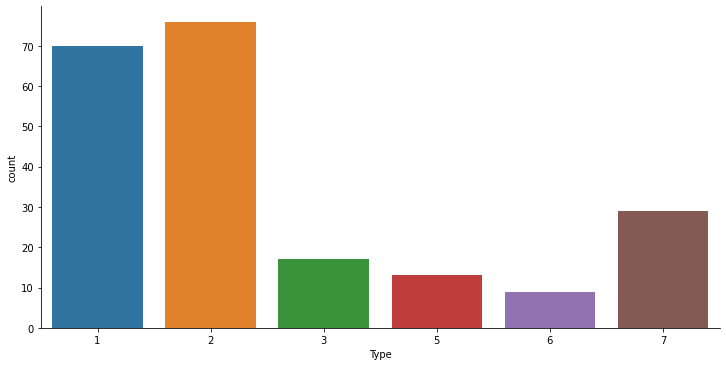

In [16]:
sns.factorplot('Type', data=glass_data, kind="count",size = 5,aspect = 2)
plt.show()

### We know that :
### 1 -- building_windows_float_processed
### 2 -- building_windows_non_float_processed
### 3 -- vehicle_windows_float_processed
### 4 -- vehicle_windows_non_float_processed (none in this database)
### 5 -- containers
### 6 -- tableware
### 7 -- headlamps

### As shown in the above graph, majority of the glass types are building_windows_float_processed (1) and building_windows_non_float_processed (2), followed by headlamps (7)
---

### Data Visualization 

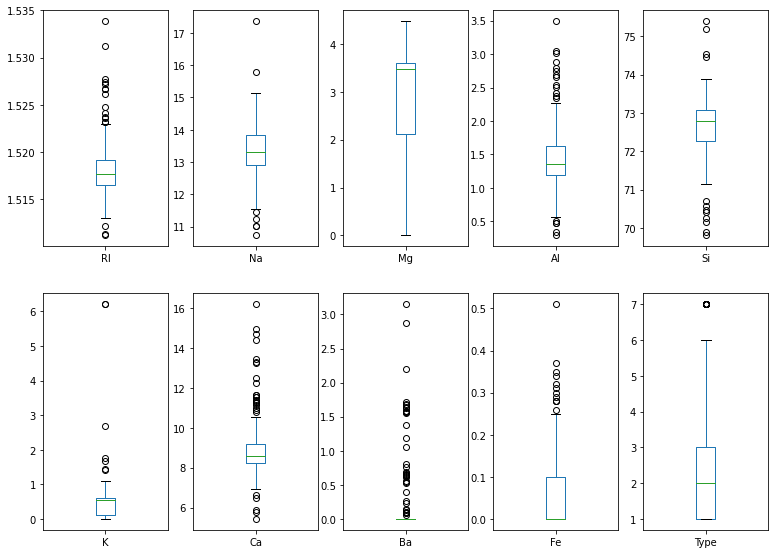

In [17]:
glass_data.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

### Model Building

In [18]:
X = glass_data.drop(['Type'],axis=1)
y = glass_data[['Type']]

In [19]:
X.shape

(214, 9)

In [20]:
y.shape

(214, 1)

In [21]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [22]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=12121)

In [24]:
X_train.shape,y_train.shape

((171, 9), (171, 1))

In [25]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

### GridSearchCV for finding the optimal number of neighbors.

In [26]:
n = np.array(range(1,40))
params = dict(n_neighbors=n)

In [27]:
knn_model = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn_model, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.6786554621848739
{'n_neighbors': 5}


### Visualizing the CV results

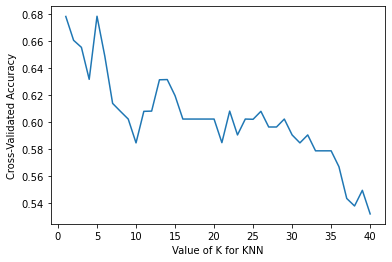

In [29]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Model Training

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### Model Testing & Model Evaluation
### Train Data

In [31]:
y_pred_train = knn_model.predict(X_train)

In [32]:
acc_train= accuracy_score(y_train, y_pred_train)
print('Accuracy :', round(acc_train,2))
print('Classification Report : \n', classification_report(y_train, y_pred_train))

Accuracy : 0.77
Classification Report : 
               precision    recall  f1-score   support

           1       0.69      0.89      0.78        56
           2       0.80      0.77      0.78        61
           3       0.80      0.29      0.42        14
           5       0.80      0.80      0.80        10
           6       0.67      0.86      0.75         7
           7       1.00      0.70      0.82        23

    accuracy                           0.77       171
   macro avg       0.79      0.72      0.73       171
weighted avg       0.79      0.77      0.76       171



### Test Data 

In [33]:
y_pred_test = knn_model.predict(X_test)

In [34]:
acc_test= accuracy_score(y_test, y_pred_test)
print('Accuracy :', round(acc_test,2))
print('Classification Report : \n', classification_report(y_test, y_pred_test))

Accuracy : 0.7
Classification Report : 
               precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.46      0.49      0.47        43
weighted avg       0.62      0.70      0.66        43



### The accuracy of the glass dataset is 70%
### Conclusion : 70% of the data is classified with n_neighbors = 5 
-----

### Standardization of X data

In [35]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,stratify=y,random_state=12121)

In [37]:
X_train.shape,y_train.shape

((171, 9), (171, 1))

In [38]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

### Finding the Optimal Number of Clusters for K with Standardized Data

In [39]:
X_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [40]:
kcv_scores = []

for i in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator =knn_model, X = X_scaled,y=y,cv = 5)
    kcv_scores.append(cv_scores.mean())
kcv_scores

[0.6212624584717608,
 0.6729789590254706,
 0.6498338870431895,
 0.6310077519379845,
 0.6497231450719824,
 0.6261351052048727,
 0.6215946843853821,
 0.6169435215946844,
 0.6169435215946844,
 0.6122923588039867]

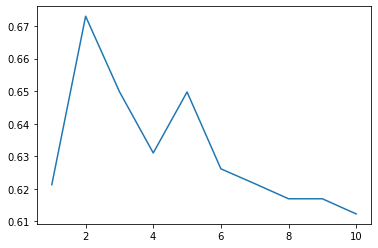

In [41]:
plt.plot(range(1,11),kcv_scores)
plt.show()

In [42]:
kcv_scores.index(max(kcv_scores))

1

### This returns the index number. Wkt, index number starts from 0 so 1 means 2.

### Model Training

In [43]:
knn_model_scaled = KNeighborsClassifier(n_neighbors=2)
knn_model_scaled.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### Model Testing & Model Evaluation
### Train Data

In [44]:
y_pred_train_scaled = knn_model_scaled.predict(X_train)

In [45]:
acc_train_scaled= accuracy_score(y_train, y_pred_train_scaled)
print('Accuracy :', round(acc_train_scaled,2))
print('Classification Report : \n', classification_report(y_train, y_pred_train_scaled))

Accuracy : 0.82
Classification Report : 
               precision    recall  f1-score   support

           1       0.77      1.00      0.87        56
           2       0.82      0.80      0.81        61
           3       1.00      0.43      0.60        14
           5       0.88      0.70      0.78        10
           6       0.86      0.86      0.86         7
           7       1.00      0.74      0.85        23

    accuracy                           0.82       171
   macro avg       0.89      0.75      0.79       171
weighted avg       0.85      0.82      0.82       171



### Test Data 

In [46]:
y_pred_test_scaled = knn_model_scaled.predict(X_test)

In [47]:
acc_test_scaled= accuracy_score(y_test, y_pred_test_scaled)
print('Accuracy :', round(acc_test_scaled,2))
print('Classification Report : \n', classification_report(y_test, y_pred_test_scaled))

Accuracy : 0.79
Classification Report : 
               precision    recall  f1-score   support

           1       0.78      1.00      0.88        14
           2       0.72      0.87      0.79        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.58      0.53      0.53        43
weighted avg       0.71      0.79      0.73        43



### The accuracy of the glass dataset is 79%
### Conclusion : After standardizing the data, 79% of the data is classified with n_neighbors = 2 